In [2]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");

v3.1


v3.0


v2.1


In [198]:
#create parameters
params = []
ϕas = [0.45, 0.5, 0.55]
ϕps = [0.25, 0.25, 0.25]
DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 20.0, 0.5, 0.3, 0.6, 1e-5, 0.1);
#T, save_interval, param_name = (19.8, 0.01, "fig_1")
T, save_interval, param_name = (40000.0, 1.0, "periodic_plot")
map(ϕas, ϕps) do ϕa, ϕp
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true)
    push!(params,param)
end
param = params[3];

In [199]:
@unpack Nx = param
using KernelDensitySJ, Peaks

#load saves
ts, f_saves = load_compress_pde(param)

ft      = permutedims(reshape(reduce(hcat,f_saves),(Nx,3,:)),(3,1,2))
# ft      = ft[t_start:1:t_end, : ,: ]
# ts      = ts[t_start:1:end]
pk      = find_xpeak_ft(ts , ft; time_length = 0.1)
centre  = Nx ÷ 2 + 1 
ft  = circshift(ft, (0,-pk + centre, 0));


full load


saved


In [194]:
ts = ts_old
ft = ft_old;

4001×400×3 Array{Float64, 3}:
[:, :, 1] =
 0.230855  0.231117  0.231377  0.231636  …  0.230062  0.230328  0.230592
 0.286446  0.286195  0.285933  0.285659     0.287126  0.286911  0.286684
 0.295339  0.295038  0.294724  0.294397     0.296164  0.295902  0.295627
 0.298927  0.298673  0.298407  0.298129     0.299622  0.299402  0.29917
 0.301771  0.301605  0.301433  0.301254     0.302227  0.302082  0.30193
 0.304142  0.304118  0.304102  0.304093  …  0.304247  0.304207  0.304172
 0.30601   0.306234  0.306494  0.30679      0.305523  0.305657  0.305818
 0.307843  0.308496  0.309225  0.310032     0.306304  0.306751  0.307262
 0.310633  0.311915  0.313315  0.314838     0.307462  0.308411  0.309466
 0.315266  0.317299  0.319485  0.321826     0.310044  0.311643  0.313382
 ⋮                                       ⋱                      
 0.164404  0.164405  0.164409  0.164413     0.164408  0.164405  0.164404
 0.164833  0.164835  0.164838  0.164843     0.164836  0.164833  0.164832
 0.165271  0.165273

In [195]:
ts_old = ts
ft_old = ft 
df = t_dff(ts , ft; N=Nx)[2]
course_x = 1:1:length(ts)
bw = 0.25
smooth_df   = KernelDensitySJ.smooth(ts[course_x],df[course_x],bw,ts[course_x])
pks, vals   = findmaxima(smooth_df)
pks, proms  = peakproms(pks, smooth_df; minprom = 0.008)
# ts[pks[3]], ts[pks[5]]
peak_1 = pks[6]
peak_2 = pks[12]
ft      = ft[peak_1:1:peak_2, : ,: ];
ts      = ts[peak_1:1:peak_2] .- ts[peak_1];

In [200]:
ft = ft[1000:1:4000,:,:]
ts = ts[1000:1:4000]

act_mxval, mxindx = findmax(ft[:,:,1]+ft[:,:,2]; dims = 2)
pas_mxval = [ft[co[1],co[2],3] for co in mxindx[:,1]]
act_mxval = [ft[co[1],co[2],1] + ft[co[1],co[2],2] for co in mxindx[:,1]];

act_mnval, mxindx = findmin(ft[:,:,1]+ft[:,:,2]; dims = 2)
pas_mnval = [ft[co[1],co[2],3] for co in mxindx[:,1]]
act_mnval = [ft[co[1],co[2],1] + ft[co[1],co[2],2] for co in mxindx[:,1]];

t_pde_rgb_image = rho_to_rgb(ft);
dt, df = t_dff(ts , ft; N=Nx);

fts = [ft]
times = [ts]
images = [t_pde_rgb_image]
dts = [dt]
dfs = [df];

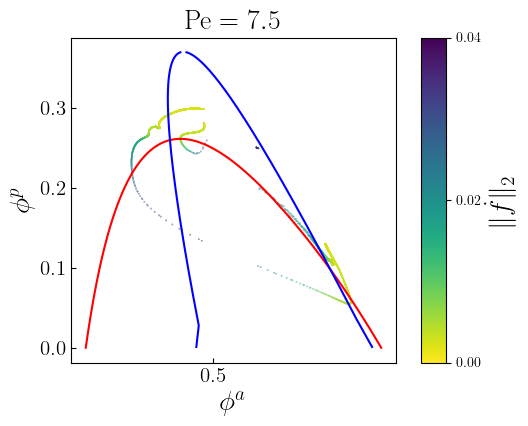

In [201]:
# create fig 
using PyPlot
PyPlot.close("all")
rc("text", usetex=true)
fig = plt.figure(figsize=(5,5))
#
ax = fig.add_axes([0.15,0.1, 0.65, 0.65])
    
step = 4*(Nx ÷ 4)
# Create a colormap (you can choose any colormap you like)
colormap = PyPlot.plt.cm.viridis_r

# Normalize color_function to the range [0, 1]
#normalized_color_function = (ts .- ts[1]) / (ts[end] - ts[1])

# Create a scatter plot with a color gradient
norm1 = matplotlib.colors.Normalize(vmin= minimum(df), vmax= 0.04)#maximum(df)) 
im1 = ax.scatter(act_mxval, pas_mxval, c=df, cmap=colormap, marker="o", s = 0.05, norm = norm1)
im2 = ax.scatter(act_mnval, pas_mnval, c=df, cmap=colormap, marker="o", s = 0.05, norm = norm1)


# ax parameters
    ax.set_xlabel(L"\phi^a",fontsize=20)
    ax.set_ylabel(L"\phi^p", fontsize=20)
    # axlim = [0, 1, 0, 0.275]
    # ax.axis(axlim)
    # ax.xaxis.set_ticks(0.:0.2:1.0)
    # ax.yaxis.set_ticks(0.:0.1:0.3)
    ax.tick_params(labelbottom = true, direction = "in")
# add colourbar
    cbar_ax = fig.add_axes([0.85, 0.1, 0.05 , 0.65])
    cbar = fig.colorbar(im1, cax=cbar_ax)
    cbar.set_ticks(0.0:0.02:0.04)
    cbar_ax.set_ylabel(L"\Vert \dot f \Vert_2",fontsize=20, rotation = 90)
    Pe = 7.5
    # load binodal
        filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
        data = wload(filename)
        @unpack Pe, γs, ϕ1s, ϕ2s = data
    
    # plot binodal
        binod = ax.plot(gammas_converter_a(γs, ϕ1s), gammas_converter_p(γs, ϕ1s), color = "red", label = "Binodal")
        ax.plot(gammas_converter_a(γs, ϕ2s), gammas_converter_p(γs, ϕ2s), color = "red", label = "_Bindoal")
        #ax.plot(0.:0.1:1., 1.:-0.1:0., color = "black", label = "_Full")
    
        rc("text", usetex=true)
        ax.xaxis.set_ticks(0.:0.5:1.0)
        ax.yaxis.set_ticks(0.:0.1:0.4)
        ax.xaxis.set_tick_params(labelsize=15)
        ax.xaxis.tick_bottom()
        ax.yaxis.set_tick_params(labelsize=15)
    
        #ax.set_title(L"\Re{ \lambda_n^\mathrm{max}} = 0",fontsize=20)
        ax.set_xlabel(L"\phi^a",fontsize=20)
        ax.set_ylabel(L"\phi^p", fontsize=20)
        # ax.legend(loc = "upper right", fontsize=20)
        # ax.set_aspect(0.25*Δρ/ΔPe)
        title = latexstring("\$ \\mathrm{Pe} = $(Pe)\$")
        ax.set_title(title,fontsize=20)
        ax.tick_params(labelbottom = true, direction = "in")
    #
    # plot spinodal
        ϕas_left, ϕas_right, ϕps = return_spin(;Pe = Pe, Δϕ = 0.001)
        ax.plot(ϕas_left, ϕps, color = "blue", label = "_Spindoal", linestyle = "-")
        ax.plot(ϕas_right, ϕps, color = "blue", label = "_Spindoal", linestyle = "-")
    #
display(fig)
fig_name = "periodic_plot"
    @unpack ϕa, ϕp, v0 = param
    pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
    mkpath(pathname)
    filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/ϕa=$(ϕa)_ϕp=$(ϕp)_v0=$(v0).pdf";
    PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)

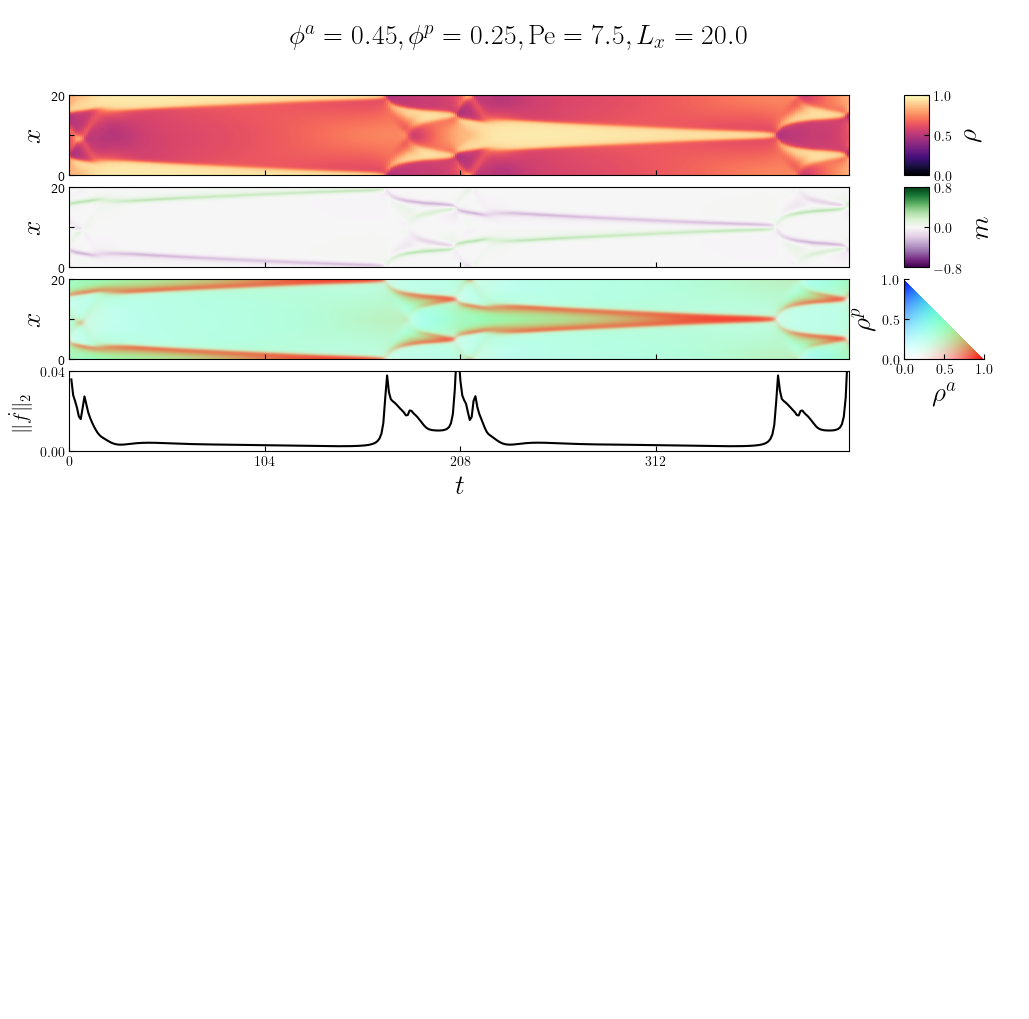

In [197]:
t_max = maximum(ts)
rhomax  = 1.0
rhomin  = 0.0
mag_lim = 0.8
height_1 = 0.08
width_1  = 0.78 #2*0.365
side_gap_1  = 0.05
bottom_gap_1  = 0.65
gap = 0.012

cbar_y_top = bottom_gap_1 + 3*height_1 + 2*gap
cbar_width = 0.1
cbar_y_bot = bottom_gap_1+ gap+ height_1#bottom_gap_1 + cbar_width + 0.02
cbar_x = 0.885 #1- cbar_width#2*width_1+ 3*side_gap_1


height_2 = 0.175
width_2  = height_2
side_gap_2  = 0.1
bottom_gap_2  = 0.4
gap_2 = 0.06

t_stamp_x = 0.03
t_stamp_y = 0.05

sf = 1.0
#create plot
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,Int64(10*sf)))
    ax = fig.add_axes([0,0,1,1],visible=true)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.spines["bottom"].set_visible(false)
    ax.spines["left"].set_visible(false)
    # ax = fig.add_axes([0.775,0,0.225,1],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
    # ax = fig.add_axes([0.025,0.5,0.95,0.45],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
# add image
    for (i,(rgb_image,ts)) in enumerate(zip(images, times))
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        ax.imshow(rgb_image; extent = [t_start,t_end,0,Lx], interpolation = "bilinear")
        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.get_yaxis().set_ticks(0:10.0:Lx)
        ax.set_yticklabels(["0","","20"])
        ax.get_xaxis().set_ticks([])
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = 20, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")
    end
# add mats
    for (i,(ts,ft)) in enumerate(zip(times, fts))
        global im1, im2
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1+2*height_1+2*gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        _, Nx, _ = size(ft)

        colmap = PyPlot.plt.cm.magma
        norm1 = matplotlib.colors.Normalize(vmin= rhomin, vmax= rhomax) 
        im1 = ax.matshow((ft[:,Nx:-1:1,1]+ft[:,Nx:-1:1,2]+ft[:,Nx:-1:1,3])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])

        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.xaxis.set_ticks([])
        ax.xaxis.tick_bottom()
        ax.get_yaxis().set_ticks(0:10.0:Lx)
        ax.set_yticklabels(["0","","20"])
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = 20, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")

        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1+height_1+gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]

        colmap = PyPlot.plt.cm.PRGn
        norm1 = matplotlib.colors.Normalize(vmin= -mag_lim, vmax= mag_lim) 
        im2 = ax.matshow((ft[:,Nx:-1:1,2]-ft[:,Nx:-1:1,1])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])
        
        ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        # ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks(0:10.0:Lx)
        ax.set_yticklabels(["0","","20"])
        ax.xaxis.tick_bottom()
        ax.axis([0,t_max, 0, Lx])
        ax.set_aspect((t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = 20, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")
    end
# add tdiff
        for (i,(ts, df)) in enumerate(zip(dts, dfs))
            ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1-height_1-gap, width_1, height_1])
            t_end = ts[end]
            t_start = ts[1]
            t_max = t_end -t_start
            ax.plot(ts[2:end], df[2:end]; color = "black")
            # if i ==1
            #     smooth_df = KernelDensitySJ.smooth(ts[2:end],df[2:end],0.2, ts[2:end])
            #     ax.plot(ts[2:end], smooth_df; color = "black")
            # else
            #     ax.plot(ts[2:end], df[2:end]; color = "black")
            # end
            #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
            
            #ax.get_xaxis().set_ticks([])
            ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
            ax.get_yaxis().set_ticks(0:0.04:0.04)
            ax.axis([t_start,t_end, 0, 0.04])
            ax.set_aspect((t_max/0.04)*(height_1/width_1)*sf)
            ax.set_ylabel(L"\Vert \dot f \Vert_2",fontsize = 15, rotation = 90)
            ax.set_xlabel(L"t", fontsize = 20)
            ax.tick_params(labelbottom = true, direction = "in")
    end
# add colour bars
    # ap cbar
    # cbar_ax = fig.add_axes([cbar_x, bottom_gap_1, cbar_width, cbar_width])
    cbar_ax = fig.add_axes([cbar_x, bottom_gap_1, height_1, height_1])

    Δ = 0.001
    cbar_f = [ x*(x+y≤ 1)*(i != 3)/2 + y*(x+y≤ 1)*(i == 3) for x in Δ:Δ:1, y in Δ:Δ:1, i in 1:3 ]  
    rgb_image = rho_to_rgb(cbar_f );

    ax = cbar_ax
    ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = 20)
    ax.set_ylabel(L"\rho^p",fontsize = 20, rotation = 90)
    ax.tick_params(direction = "in")
    # rho cbar
    # rho_cbar_ax = fig.add_axes([0.9, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    rho_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot+gap+height_1, 0.025, height_1])
    rho_cbar = fig.colorbar(im1, cax=rho_cbar_ax)
    # rho_cbar_ax.set_title(L"\rho",fontsize=25)
    rho_cbar_ax.set_ylabel(L"\rho",fontsize=20,rotation = 90)
    rho_cbar.set_ticks( rhomin:0.5:rhomax)
    rho_cbar_ax.yaxis.set_ticks_position("right")
    rho_cbar_ax.tick_params(direction = "in")
    # mag cbar
    # mag_cbar_ax = fig.add_axes([0.935, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    mag_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot, 0.025, height_1])
    # mag_cbar_ax.set_title(L"{m}",fontsize=25) #mathbf{}
    mag_cbar = fig.colorbar(im2, cax=mag_cbar_ax)
    mag_cbar.set_ticks((-mag_lim):0.8:mag_lim)
    mag_cbar_ax.tick_params(direction = "in")
    mag_cbar_ax.yaxis.set_ticks_position("right")
    mag_cbar_ax.set_ylabel(L"m",fontsize=20,rotation = 90)
#
#title
    @unpack v0, ϕa, ϕp, Lx = param
    latex_title = latexstring("\$ \\phi^a = $(ϕa), \\phi^p = $(ϕp), \\mathrm{Pe} = $(v0), L_x = $(Lx)\$")
    fig.suptitle(latex_title,fontsize=20)
# time stamp
    # latex_annotation = latexstring("\$ t = $(round( times[1][end];digits = 1))\$")
    # ax.annotate(latex_annotation, (t_stamp_x, bottom_gap_2+t_stamp_y), xycoords = "figure fraction", rotation = 90, fontsize = 20 )
display(fig)
fig_name = "sim_plot_zoom"
     @unpack ϕa, ϕp, v0 = param
     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
     mkpath(pathname)
     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/ϕa=$(ϕa)_ϕp=$(ϕp)_v0=$(v0).pdf";
     PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


In [187]:
ts

217-element Vector{Float64}:
   0.0
   0.9999978661701334
   1.9999846643912633
   3.000015565039689
   4.000001214559859
   4.999979264200078
   5.99998807698978
   6.999984421136048
   7.999977925306723
   8.999995343218131
   ⋮
 207.99998692199745
 208.9999806179361
 209.99998008349314
 211.0000131927169
 211.99999931218258
 212.9999810360905
 213.99998903535447
 215.000001504657
 216.00000300318925

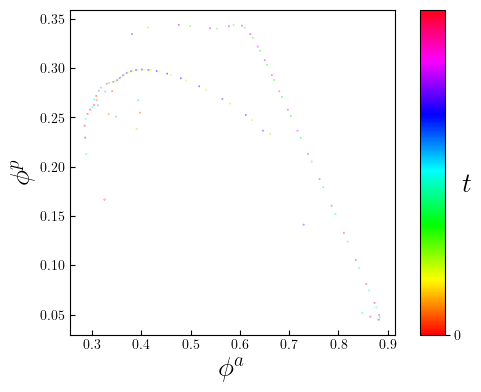

In [76]:
# create fig 
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(5,5))
#
ax = fig.add_axes([0.15,0.1, 0.65, 0.65])
        
step = 4*(Nx ÷ 4)
# Create a colormap (you can choose any colormap you like)
colormap = get_cmap("hsv")

# Normalize color_function to the range [0, 1]
#normalized_color_function = (ts .- ts[1]) / (ts[end] - ts[1])

# Create a scatter plot with a color gradient
norm1 = matplotlib.colors.Normalize(vmin= ts[1], vmax= ts[end]) 
im1 = ax.scatter(ft[:,step,1]+ft[:,step,2], ft[:,step,3], c=ts, cmap=colormap, marker="o", s = 0.05, norm = norm1)

# ax parameters
    ax.set_xlabel(L"\phi^a",fontsize=20)
    ax.set_ylabel(L"\phi^p", fontsize=20)
    # axlim = [0, 1, 0, 0.275]
    # ax.axis(axlim)
    # ax.xaxis.set_ticks(0.:0.2:1.0)
    # ax.yaxis.set_ticks(0.:0.1:0.3)
    ax.tick_params(labelbottom = true, direction = "in")
# add colourbar
    cbar_ax = fig.add_axes([0.85, 0.1, 0.05 , 0.65])
    cbar = fig.colorbar(im1, cax=cbar_ax)
    cbar.set_ticks(0.0:1000:ts[end])
    cbar_ax.set_ylabel(L"t",fontsize=20, rotation = 0)

display(fig)
# fig_name = "periodic_plot"
#     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
#     mkpath(pathname)
#     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/v0=$(v0).pdf";
#     PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)

In [61]:
#plot spinodal
ϕas = collect(0.001:0.001:0.999)
    ϕa_sols, low_ϕps, high_ϕps = return_complex_boundary_outer(ϕas; Pe = Pe)
    n = length([x for x in ϕa_sols if x < 0.42])
    N = length(ϕa_sols)
    ax.plot(ϕa_sols[1:n], low_ϕps[1:n], color = "green", label = "Complex")
    ax.plot(ϕa_sols[1:n], high_ϕps[1:n], color = "green", label = "_Complex")
    ax.plot(ϕa_sols[(n+1):1:N], low_ϕps[(n+1):1:N], color = "green", label = "_Complex")
    ax.plot(ϕa_sols[(n+1):1:N], high_ϕps[(n+1):1:N], color = "green", label = "_Complex")


    ϕa_sols, low_ϕps1, high_ϕps1, low_ϕps2, high_ϕps2 = return_complex_boundary_inner(ϕas; Pe = Pe)
    ax.plot(ϕa_sols, low_ϕps1, color = "green", label = "_Complex")
    ax.plot(ϕa_sols, high_ϕps1, color = "green", label = "_Complex")
    ax.plot(ϕa_sols, low_ϕps2, color = "green", label = "_Complex")
    ax.plot(ϕa_sols, high_ϕps2, color = "green", label = "_Complex")
    
    ϕa_low, ϕa_high, low_ϕps2, high_ϕps2 = return_stable_boundary(ϕas; Pe = Pe)
    ax.plot(ϕa_low, low_ϕps2, color = "blue", label = "Spinodal")
    ax.plot(ϕa_high, high_ϕps2, color = "blue", label = "_Spindoal")

    ϕa_low, ϕa_mid, ϕa_high, low_ϕps, mid_ϕps, high_ϕps = return_stable_boundary_extra(ϕas; Pe = Pe)
    ax.plot(ϕa_low, low_ϕps, color = "blue", label = "_Spinodal")
    ax.plot(ϕa_high, high_ϕps, color = "blue", label = "_Spindoal")
    ax.plot(ϕa_mid, mid_ϕps, color = "blue", label = "_Spindoal")

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7a16f495e0>

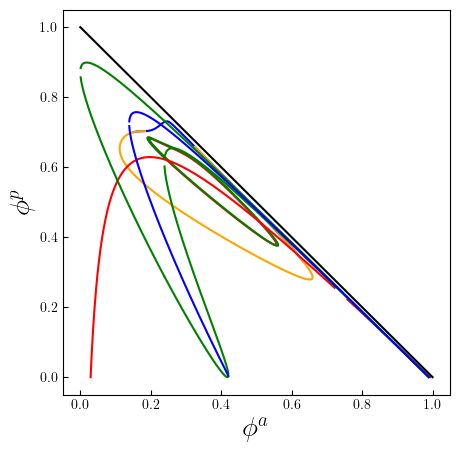

In [63]:
ax.plot(0.:0.1:1., 1.:-0.1:0., color = "black", label = "_Full")
display(fig)

In [74]:
using PyPlot

# Create data for the x-axis and a corresponding function for colors
x = range(0, stop=10, length=1000)
color_function = sin.(x)

# Create a colormap (you can choose any colormap you like)
colormap = get_cmap("viridis")

# Create a figure
fig, ax = subplots()

# Normalize color_function to the range [0, 1]
normalized_color_function = (color_function .- minimum(color_function)) / (maximum(color_function) - minimum(color_function))

# Create a scatter plot with a color gradient
scatter(x, color_function, c=normalized_color_function, cmap=colormap, marker="o")

# Create a colorbar to show the mapping of colors to values
cbar = colorbar()

# Set the axis limits
ax.set_xlim(x[1], x[end])
ax.set_ylim(minimum(color_function), maximum(color_function))

# Show the plot
show()


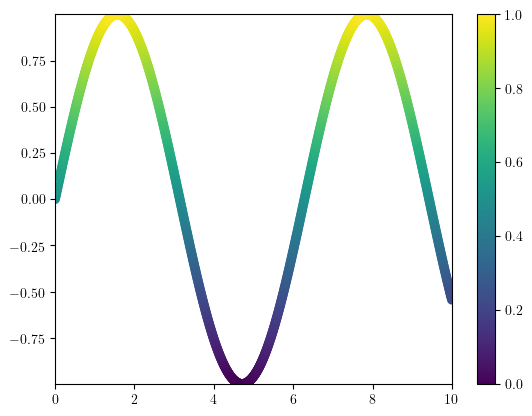

In [75]:
display(fig)